# Analysis of 2500 TED videos

### Content:
+ Introduction
+ Data description
+ Reserach questions
+ Data preparation
+ EDA and Visualisation
+ Conclusion 

## 1. Introduction

 TED is a non-profit organization,which began in 1984 as a conference that brought together technology, entertainment and design. Today, everyone knows that main goal of TED is  spreading ideas, usually in the form of short, persuasive talks. It covers all topics from global issues to fashion and design.
 
   TED was born in 1984 out of Richard Saul Wurman's observation of a powerful convergence among three fields: technology, entertainment and design. The first TED, which he co-founded with Harry Marks, included a demo of the compact disc, the e-book and cutting-edge 3D graphics from Lucasfilm, while mathematician Benoit Mandelbrot demonstrated how to map coastlines using his developing theory of fractal geometry.
   
   The agenda of TED is to make great ideas accessible and spark conversation. The magic of TED is that participants and speakers have the opportunity to exchange experiences and draw inspiration from unusual places, as well as listen to more than 50 talks in one week. TED has 95 million monthly unique viewers and every second 35 people watch a TED Talks. Also has partners like Samsung, Cartier, Marriott ,Ups and e.t.c.

Source(https://www.ted.com/talks)

## 2. Data description

According to the information bellow,TED is very popular and is watched by people from all over the world.It will be very interesting and useful to find out general information about most popular TED videos and analyse all this videos according to certain criteria.
My analysis will be based on the information from database, which I found on Kaggle and used information bellow:
    
- Name of the video
- Number of cooments 
- Duration of the video
- Event - in which event this speech took place
- Film_date - Unix timestamp of the video
- Main speaker - Full name of the main speaker of the video
- Rating of the video - various rating which give to the video
- Releated_talks - videos which recommended to watch 
- Speaker ocupation - Job profession of the speaker
- Tags - tags related to the video
- Views - number of views

## 3. Research questions

1. Which videos attract maximum attention and discuss(comments)?
2. People with what pofessions are most speakers at TED?
3. Which Ted events have maximum number of videos?
4. What is the average duration of Ted videos?
5. Which tags are most common?

## 4. Data preparation

In [123]:
#import module
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import socket

In [124]:
#to open the dataset
hp_file = open(file='ted_main.csv', mode='r' )

In [125]:
df = pd.read_csv('ted_main.csv')

In [126]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [127]:
df.drop(['description','languages','num_speaker','published_date','title','url'], axis='columns',inplace=True)

In [128]:
df.tail(3)
#we can see that number of columns decreased to 11

,comments,duration,event,film_date,main_speaker,name,ratings,related_talks,speaker_occupation,tags,views
2547,10,651,TED2017,1492992000,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",375647
2548,32,1100,TEDxMileHigh,1499472000,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",419309
2549,8,519,TED2017,1492992000,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",391721


In [129]:
df1 = df.dropna()
df1.info()
#removes rows which contain missing data,it will help to do analysis more accurate
#in my dataset I have 6 rows with missing values and they were removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2544 non-null   int64 
 1   duration            2544 non-null   int64 
 2   event               2544 non-null   object
 3   film_date           2544 non-null   int64 
 4   main_speaker        2544 non-null   object
 5   name                2544 non-null   object
 6   ratings             2544 non-null   object
 7   related_talks       2544 non-null   object
 8   speaker_occupation  2544 non-null   object
 9   tags                2544 non-null   object
 10  views               2544 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 238.5+ KB


In [130]:
df1['name'].is_unique
#to make sure that videos unique and not repeated

True

In [150]:
df1['film_date'] = pd.to_datetime(df1['film_date'], unit='s')
#convert Unix time value to date time,its do data more understandable

In [151]:
df1.head(2)

,comments,duration,event,film_date,main_speaker,name,ratings,related_talks,speaker_occupation,tags,views
0,4553,1164,TED2006,2006-02-25,Ken Robinson,Ken Robinson: Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",47227110
1,265,977,TED2006,2006-02-25,Al Gore,Al Gore: Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",3200520


In [152]:
event_df = df1[['comments', 'name','event','views']].groupby('event').count().reset_index()
event_df.columns = ['event','teds','total_comment','total_view']
event_df
#group by events in order to analyze in the future at which events there were more Ted talks

,event,teds,total_comment,total_view
0,AORN Congress,1,1,1
1,Arbejdsglaede Live,1,1,1
2,BBC TV,1,1,1
3,Bowery Poetry Club,1,1,1
4,Business Innovation Factory,3,3,3
...,...,...,...,...
350,The Do Lectures,1,1,1
351,Toronto Youth Corps,1,1,1
352,University of California,2,2,2
353,Web 2.0 Expo 2008,1,1,1


In [153]:
speakers_df = df1[['speaker_occupation','main_speaker']].groupby('main_speaker').count().reset_index()
speakers_df.columns = ['main_speaker','numberOfTeds']
speakers_df = speakers_df.sort_values('numberOfTeds', ascending=False)
speakers_df.head(10)
#group by events in order to analyze in the future at which speaker has most Ted videos

,main_speaker,numberOfTeds
767,Hans Rosling,9
1063,Juan Enriquez,7
1275,Marco Tempest,6
1689,Rives,6
422,Dan Ariely,5
395,Clay Shirky,5
1484,Nicholas Negroponte,5
248,Bill Gates,5
1072,Julian Treasure,5
847,Jacqueline Novogratz,5


In [154]:
def clean_text(x):
    letter_only=re.sub("[^a-zA-Z]", " ", x)
    return ' '.join(letter_only.split()).lower()
df1['tags']=df['tags']
df1.tags=df1.tags.astype('str')
df1['tags']=df1['tags'].apply(clean_text)
#change type of column and remove unnecessary sign will help in future analysis


In [155]:
df1.head(2)

,comments,duration,event,film_date,main_speaker,name,ratings,related_talks,speaker_occupation,tags,views
0,4553,1164,TED2006,2006-02-25,Ken Robinson,Ken Robinson: Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",47227110
1,265,977,TED2006,2006-02-25,Al Gore,Al Gore: Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",3200520


## 5. EDA and visualisation

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt 

## 5.1 People with what pofessions are most speakers at TED?

To find the answer to this question, I created a new dataframe with columns main_speaker and speaker_occupation and group it by occupation of speakers.After,find most common 10 occupations.

In [157]:
occupation = df1[['main_speaker', 'speaker_occupation']].groupby('speaker_occupation').count().reset_index()
occupation.columns = ['speaker_occupation','count']
occupation.sort_values('count', ascending=False).head(10)
# group by speaker_occupation and count each occupation and output the most 10 popular ocupation among speakers

,speaker_occupation,count
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


[Text(0.5, 1.0, "Figure 1 : Top 10 speaker's occupation")]

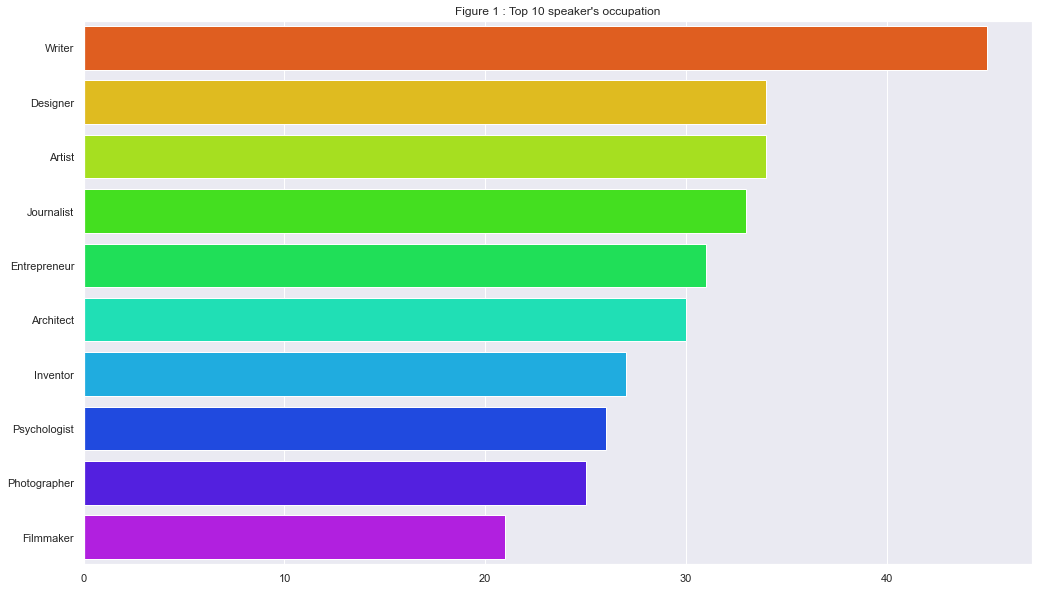

In [158]:
fig,ax = plt.subplots(figsize=(17,10))
a = sns.barplot(y = df1['speaker_occupation'].value_counts(ascending=False).head(10).index, 
              x = df1['speaker_occupation'].value_counts(ascending=False).head(10).values,
                 ax = ax, palette = 'gist_rainbow')
a.set(title = "Figure 1 : Top 10 speaker's occupation")

#### People with what pofessions are most speakers at TED?
From this graph and barplot we can find answer to this question.We can see that Ted speakers can have different profession and it doesn't affect in any way on their speech and performance.By grouping them by occupation type I identified number of speakers with each profession and highlighted the most common of them and spot that most spread professions are writer,designer and artist.

## 5.2 Which videos attract maximum attention and discuss(comments)?

To find the answer to this question, I created 2 new dataframe with columns comments,name,views and sort it by  number of comments and views .After,find 10 videos with maximum number of comments and separately with maximum number of views.To analyze the relationship between them,I merged this to tables.

In [159]:
new_df = df1[['comments','name', 'views']]
comment_df = new_df.sort_values('comments', ascending=False).head(10)
comment_df
# create new dataframe with this columns to analyze most viewed and commented videos

,comments,name,views
96,6404,Richard Dawkins: Militant atheism,4374792
0,4553,Ken Robinson: Do schools kill creativity?,47227110
644,3356,Sam Harris: Science can answer moral questions,3433437
201,2877,Jill Bolte Taylor: My stroke of insight,21190883
1787,2673,David Chalmers: How do you explain consciousness?,2162764
954,2492,Janet Echelman: Taking imagination seriously,1832930
840,2374,Lesley Hazleton: On reading the Koran,1847256
1346,2290,Amy Cuddy: Your body language may shape who yo...,43155405
661,2272,Michael Specter: The danger of science denial,1838628
677,1930,Simon Sinek: How great leaders inspire action,34309432


[Text(0.5, 1.0, 'Figure 2.1 : Top 10 most commented Ted videos')]

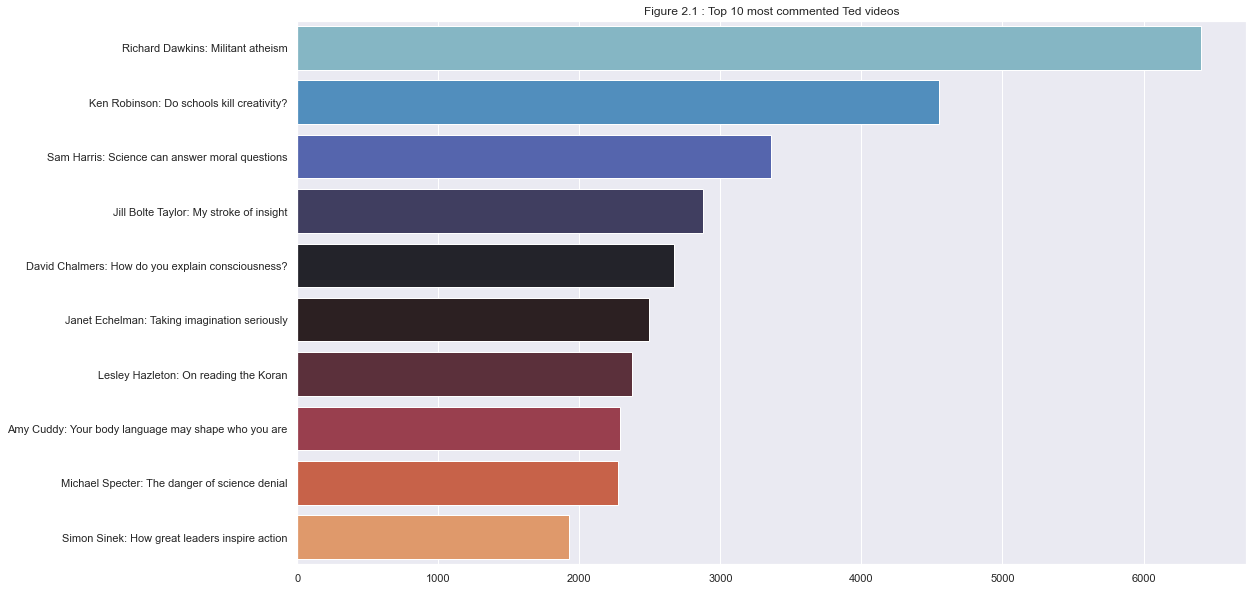

In [160]:
fig,ax=plt.subplots(figsize=(17,10))
ax = sns.barplot(y=new_df.sort_values(by='comments', ascending=False)['name'].head(10).values,
            x=new_df.sort_values(by='comments', ascending=False)['comments'].head(10).values, palette='icefire', ax=ax)
ax.set(title = "Figure 2.1 : Top 10 most commented Ted videos")

In [161]:
view_df = new_df.sort_values('views', ascending=False).head(10)
view_df

,comments,name,views
0,4553,Ken Robinson: Do schools kill creativity?,47227110
1346,2290,Amy Cuddy: Your body language may shape who yo...,43155405
677,1930,Simon Sinek: How great leaders inspire action,34309432
837,1927,Brené Brown: The power of vulnerability,31168150
452,354,Mary Roach: 10 things you didn't know about or...,22270883
1776,297,Julian Treasure: How to speak so that people w...,21594632
201,2877,Jill Bolte Taylor: My stroke of insight,21190883
5,672,Tony Robbins: Why we do what we do,20685401
2114,150,James Veitch: This is what happens when you re...,20475972
1416,846,Cameron Russell: Looks aren't everything. Beli...,19787465


[Text(0.5, 1.0, 'Figure 2.2 : Top 10 most viewed Ted videos')]

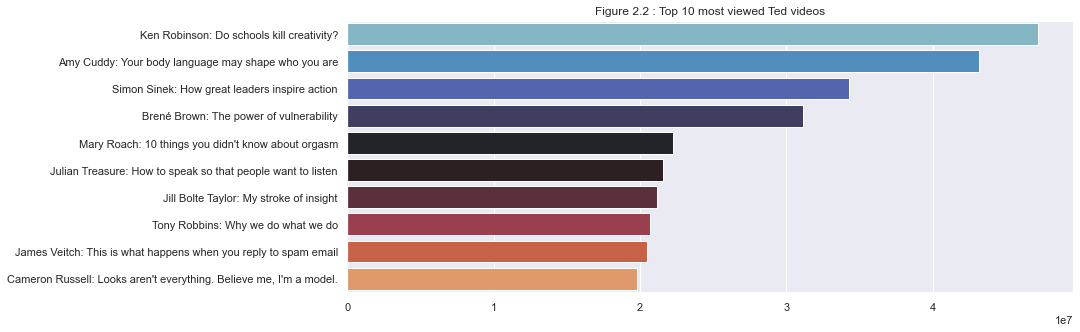

In [162]:
fig,ax=plt.subplots(figsize=(13,5))# Create matplotlib figure
ax = sns.barplot(y=new_df.sort_values(by='views', ascending=False)['name'].head(10).values,
            x=new_df.sort_values(by='views', ascending=False)['views'].head(10).values, palette='icefire', ax=ax)# Create matplotlib axes
ax.set(title = "Figure 2.2 : Top 10 most viewed Ted videos")

In [163]:
top = pd.merge(comment_df,view_df,on=['comments','name', 'views'],how='outer',indicator=True)
top
#Connect two tables:most viewed and most commented ted videos, to see their interconnection.

,comments,name,views,_merge
0,6404,Richard Dawkins: Militant atheism,4374792,left_only
1,4553,Ken Robinson: Do schools kill creativity?,47227110,both
2,3356,Sam Harris: Science can answer moral questions,3433437,left_only
3,2877,Jill Bolte Taylor: My stroke of insight,21190883,both
4,2673,David Chalmers: How do you explain consciousness?,2162764,left_only
5,2492,Janet Echelman: Taking imagination seriously,1832930,left_only
6,2374,Lesley Hazleton: On reading the Koran,1847256,left_only
7,2290,Amy Cuddy: Your body language may shape who yo...,43155405,both
8,2272,Michael Specter: The danger of science denial,1838628,left_only
9,1930,Simon Sinek: How great leaders inspire action,34309432,both


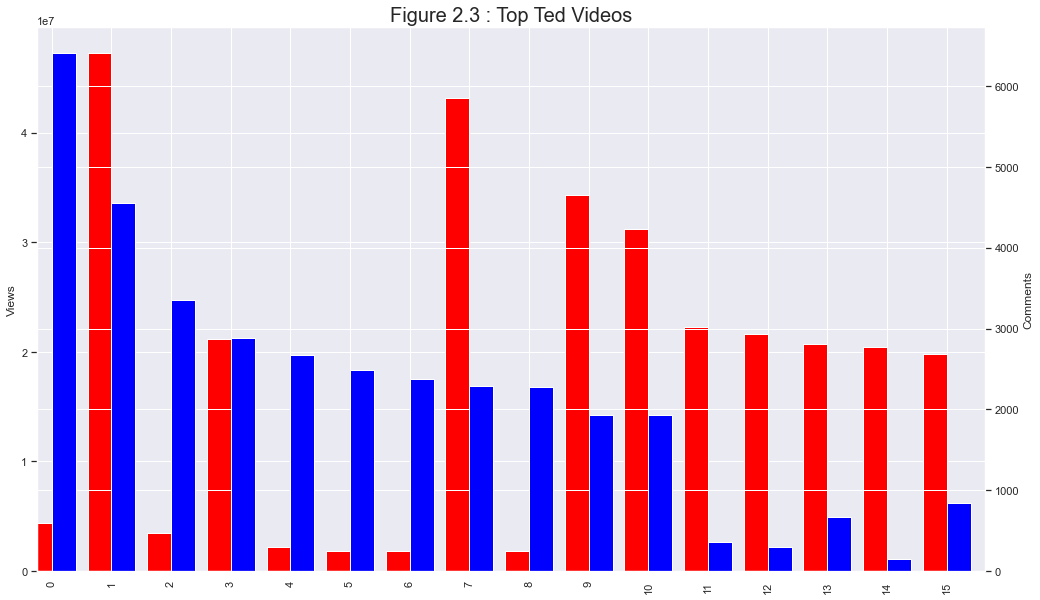

In [164]:
fig = plt.figure(figsize=(17,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

top.views.plot(kind='bar', color='red', ax=ax, width=width, position=1)
top.comments.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Views')
ax2.set_ylabel('Comments')
plt.title("Figure 2.3 : Top Ted Videos", size=20)
plt.show()

#### Which videos attract maximum attention and discuss(comments)?
     To find out answer to this question I analyse by 2 criterias its views and comments.Firstly, I identified 2 tables with most viewed and most commented 10 Ted videos.By merging them , I want to find interconnections of them and check whether the regularity of where there are more views there are more comments.But from last diagram("Top Ted videos"), we see that views don't affect the number of comments, and vice versa.
     
     The largest number of comments was collected by video Richard Dawkins: Militant atheism, with a 6404 comments, but on this video the number of views is relatively low,4374792 which is about 11% of the most watched video.

## 5.3 Which Ted events have maximum number of videos?

To find the answer to this question, I created a new dataframe which grouped by Ted events and have the number of video in each event After,find 10 events with maximum number of videos.

In [167]:
new2_df = event_df[['event','teds']]
new2_df = new2_df.sort_values('teds', ascending=False).head(10)
new2_df

,event,teds
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
57,TED2007,68
67,TED2017,67


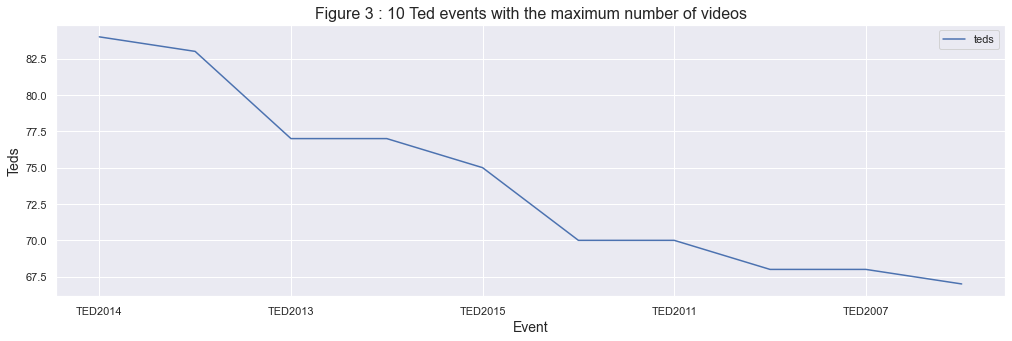

In [172]:
plt.figure(figsize=(17, 5))
ax = plt.gca()
new2_df.plot( x = "event", y = "teds", ax=ax)
ax.set_xlabel('Event' ,size = 14)
ax.set_ylabel('Teds', size = 14)
ax.set_title("Figure 3 : 10 Ted events with the maximum number of videos" ,size = 16);


Which Ted events have maximum number of videos?
From this line plot(Figure 3) we can see the Ted events with maximum number of videos and in the first place is Ted2014 which have 84 videos.

## 5.4 What is the average duration of Ted videos?

To answer this question I create histogram with duration of each ted video in my dataframe.

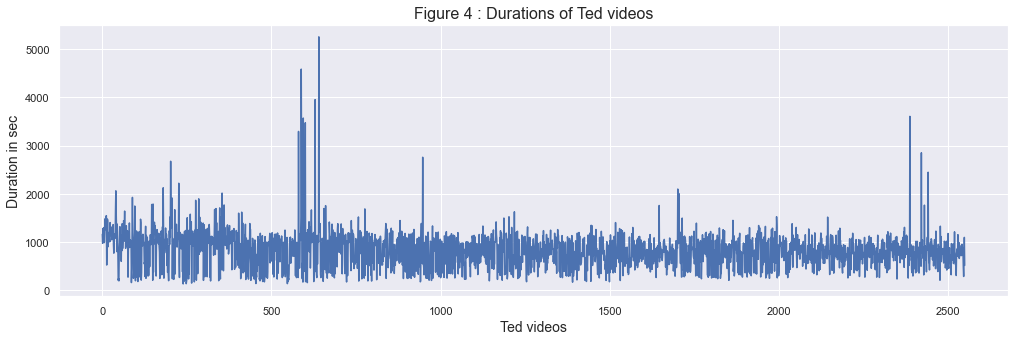

In [174]:
plt.figure(figsize=(17, 5))
ax = plt.gca()
plt.plot(list(duration_df.index), list(duration_df.duration))
ax.set_xlabel('Ted videos' ,size = 14)
ax.set_ylabel('Duration in sec', size = 14)
ax.set_title("Figure 4 : Durations of Ted videos" ,size = 16);


What is the average duration of Ted videos?
From the Figure 4 we can see that average duration of this videos is 900-1200 seconds which is 15-20 minutes.

## 5.5 Which tags are most common?

To answer to this question I collect all value of tags to one list and count them.From this list found most common 15.

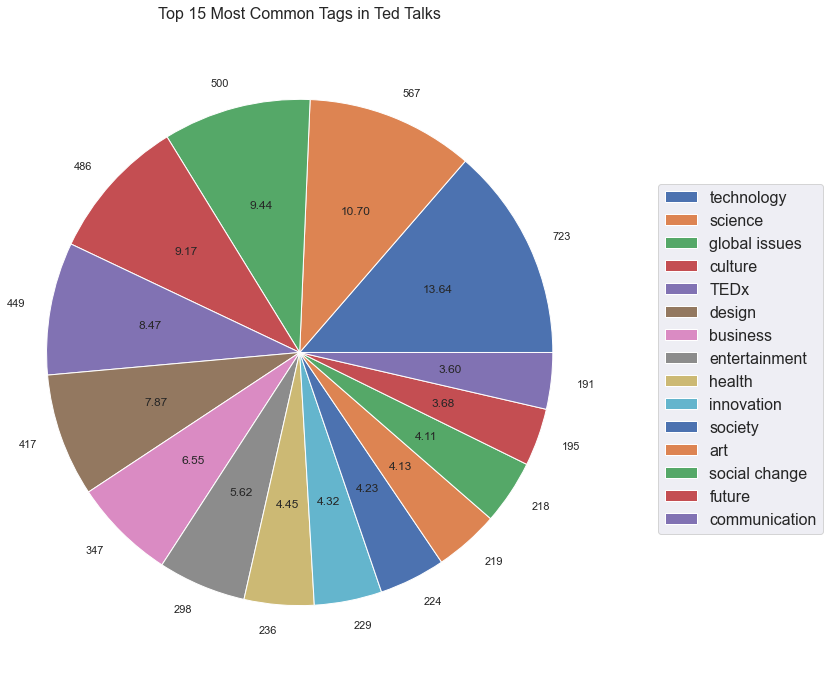

In [149]:
import datetime
from collections import Counter
import ast
flat_list=[]
for index, row in df1.iterrows():
    tag = ast.literal_eval(row['tags'])
    for item in tag:
        flat_list.append(item)
tag_count = Counter(flat_list)
tag_cat = [tag[0] for tag in tag_count.most_common(15)]
tag_val = [tag[1] for tag in tag_count.most_common(15)]

fig, ax = plt.subplots(figsize=(10, 7))
plt.pie(tag_val, labels=tag_val, autopct='%.2f', shadow=False)
ax.axis('equal') 
plt.title('Top 15 Most Common Tags in Ted Talks' ,size = 16)
plt.legend(tag_cat,bbox_to_anchor=(1,1), fontsize=16, bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(bottom=0, top=1.3)
plt.show()




Which Ted events have maximum number of videos?
From this pie chart we can see most common tags used in Ted videos. The tag Technology is the most often used tag in Ted videos.It means the Ted music mostly connected with the theme of Technology,because this tag is meets in 13.64% of all ted videos in my dataset.

## 6.Conclusion

According on the analysis above I understand several things about Ted Talks and open new things for me.

First,person with any profession can be a speaker on Teds and share his knowledge and experiences which may help to viewers.

Second,not always comments and views can be linked.  It does not always happen that where there are the most number of comments, there are the most number of views.

Third,each Ted event may have different number of talks.It most of all depends on the event itself and on its scope of.

Forth,Ted videos can be with different duration.Start from 5 minutes to one hour. It all depends on the topic of speech and from the speaker himself.

Fifth,in the century of technology and innovations most viewed and popular Teds its with the tag related to this.It means talks with tag technology, science, innovation and future.

Finally,nowadays Ted Talks are very popular.